In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="2"
from IPython import display
display.clear_output()
!yolo mode=checks

from ultralytics import YOLO 
from IPython.display import display, Image


WARNING ⚠️ 'yolo mode=checks' is deprecated. Use 'yolo checks' instead.
Ultralytics YOLOv8.0.90 🚀 Python-3.9.16 torch-2.0.0 CUDA:0 (NVIDIA RTX A4000, 16109MiB)
Setup complete ✅ (64 CPUs, 251.7 GB RAM, 486.5/1758.9 GB disk)


In [2]:
#!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="McoQ2UFDxFzalwE5z5dN")
project = rf.workspace("mohamed-traore-2ekkp").project("taco-trash-annotations-in-context")
dataset = project.version(2).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.90, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to TACO:-Trash-Annotations-in-Context-Dataset-2 in yolov8:: 100%|██████████| 7196/7196 [00:00<00:00, 10084.40it/s]


In [3]:
!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=50 imgsz=550

Ultralytics YOLOv8.0.90 🚀 Python-3.9.16 torch-2.0.0 CUDA:0 (NVIDIA RTX A4000, 16109MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/home/hpate061/CitrusHack/TACO:-Trash-Annotations-in-Context-Dataset-2/data.yaml, epochs=50, patience=50, batch=16, imgsz=550, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=

In [4]:
!ls ./runs/detect/train

args.yaml				      train_batch0.jpg
confusion_matrix.png			      train_batch1.jpg
events.out.tfevents.1682810888.kona.462942.0  train_batch2.jpg
F1_curve.png				      val_batch0_labels.jpg
labels_correlogram.jpg			      val_batch0_pred.jpg
labels.jpg				      val_batch1_labels.jpg
P_curve.png				      val_batch1_pred.jpg
PR_curve.png				      val_batch2_labels.jpg
R_curve.png				      val_batch2_pred.jpg
results.csv				      weights
results.png


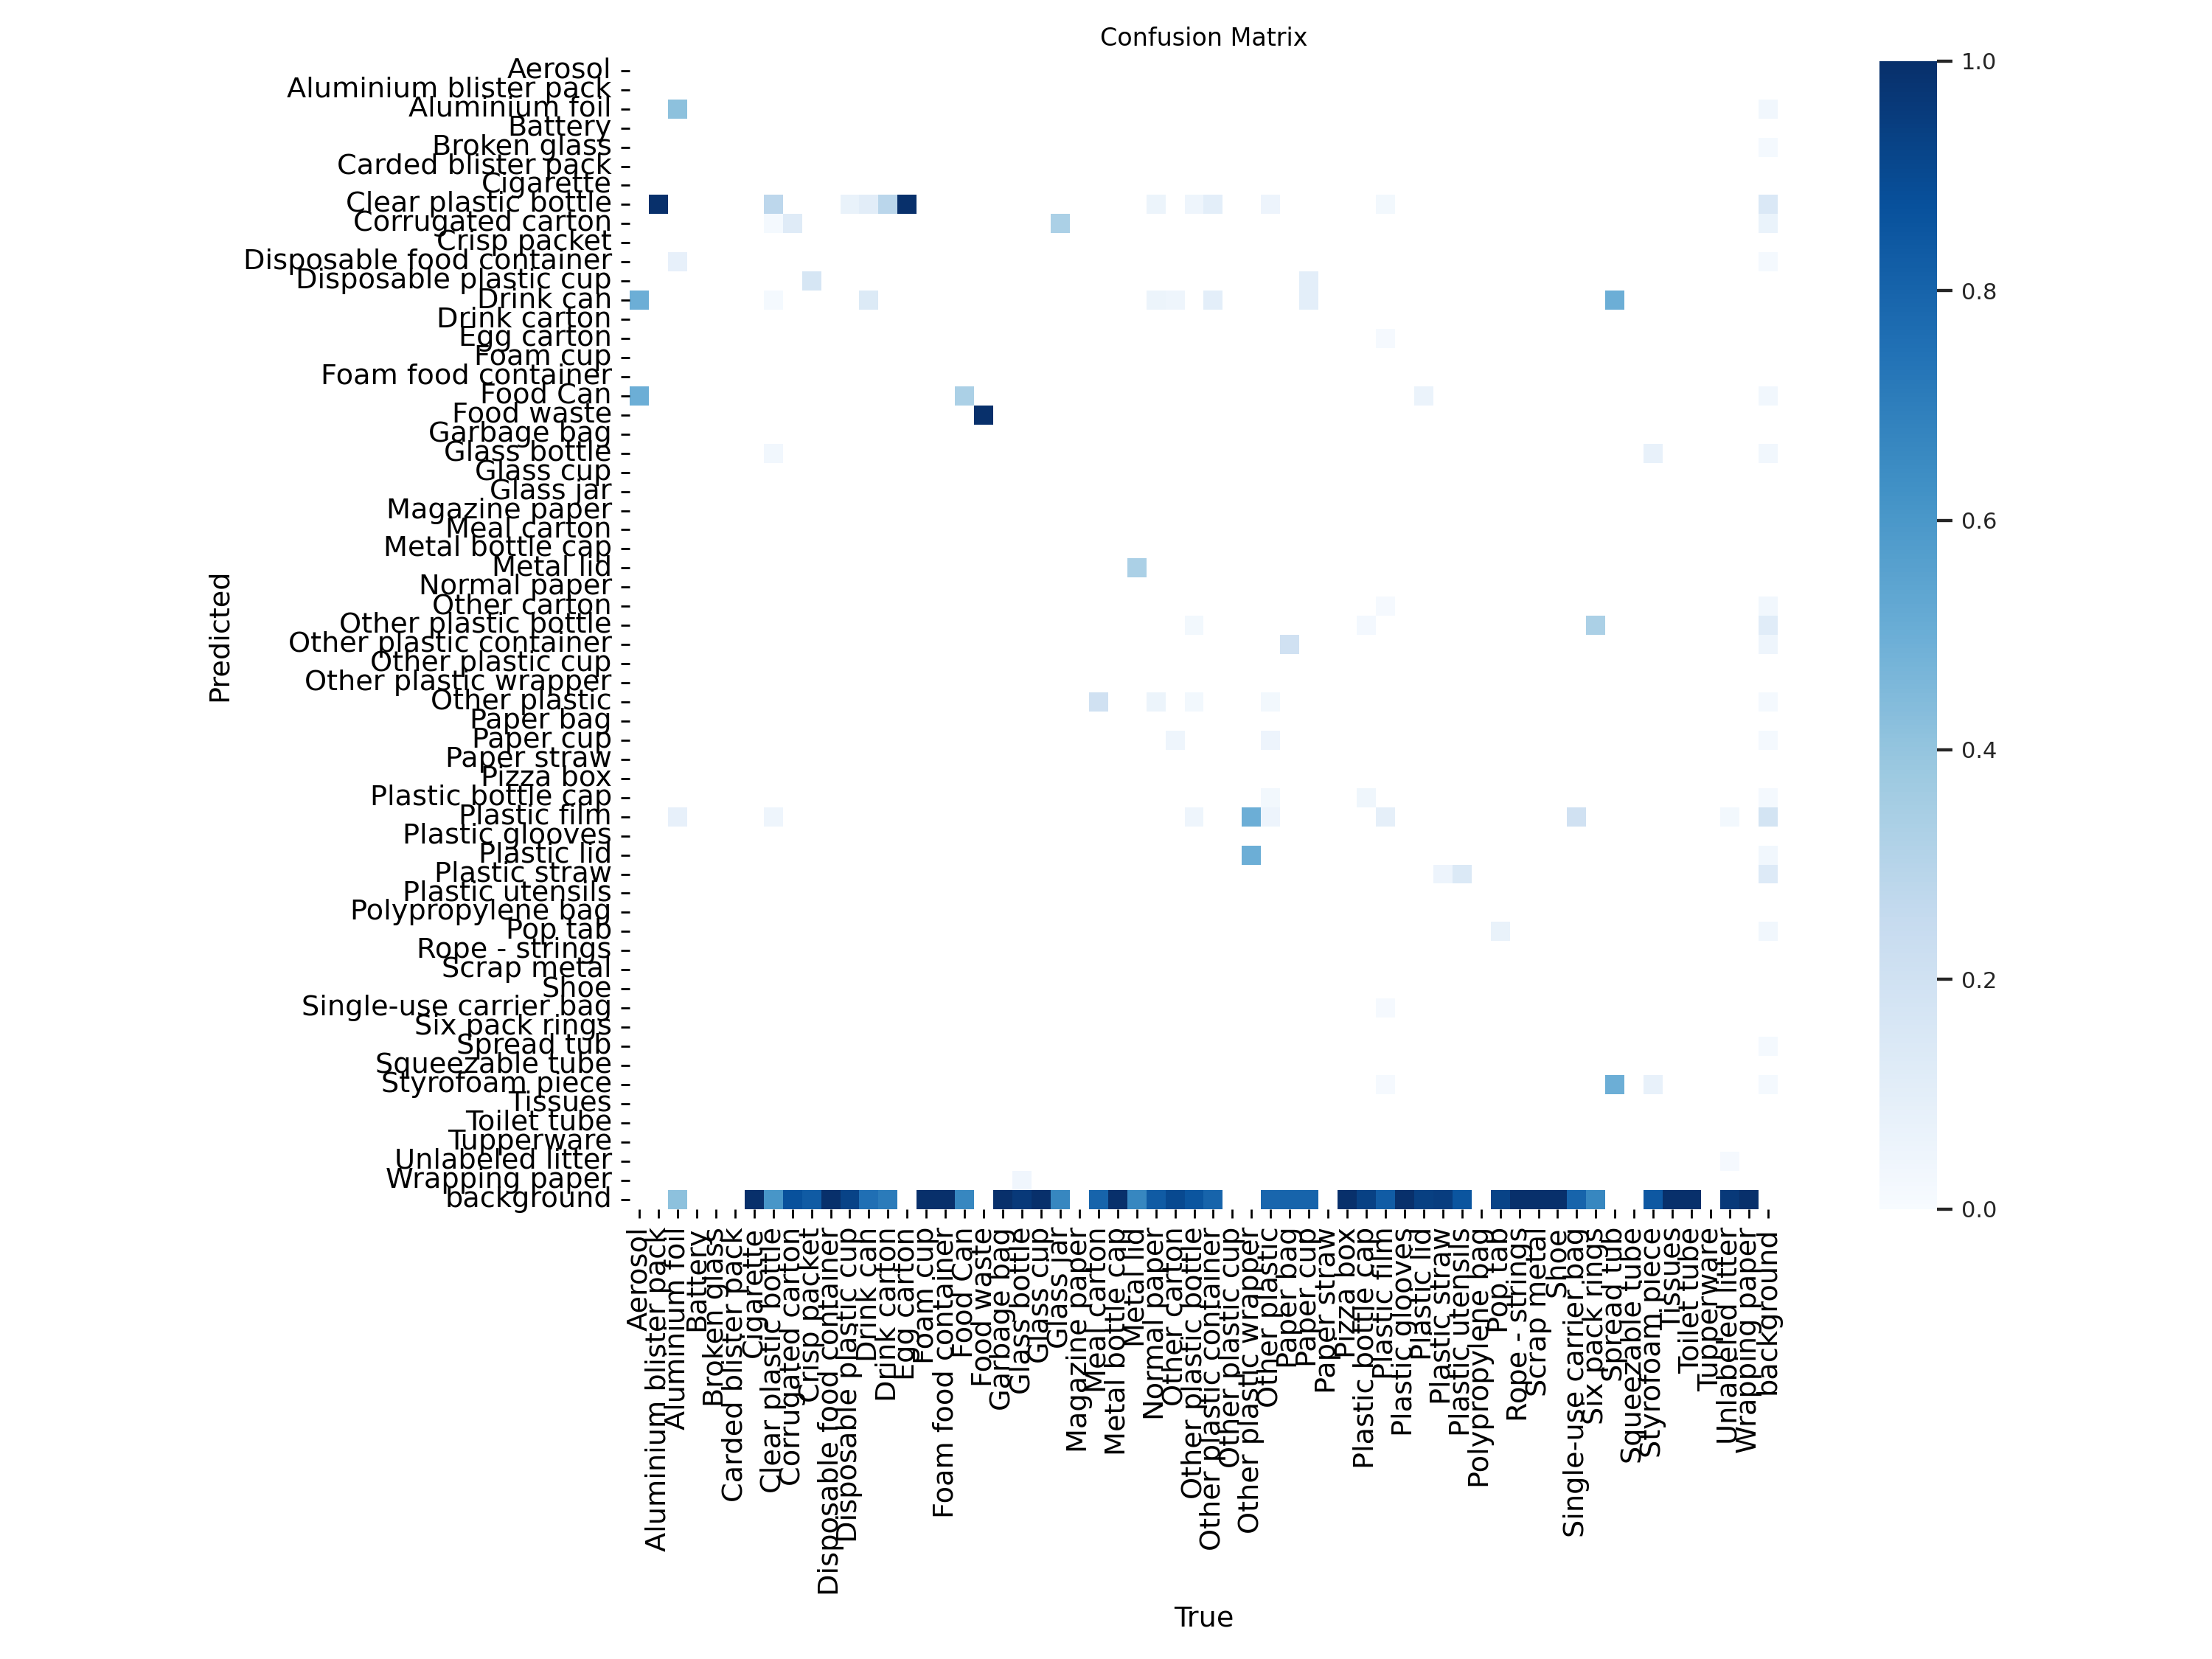

In [5]:
Image("/home/hpate061/CitrusHack/runs/detect/train/confusion_matrix.png")

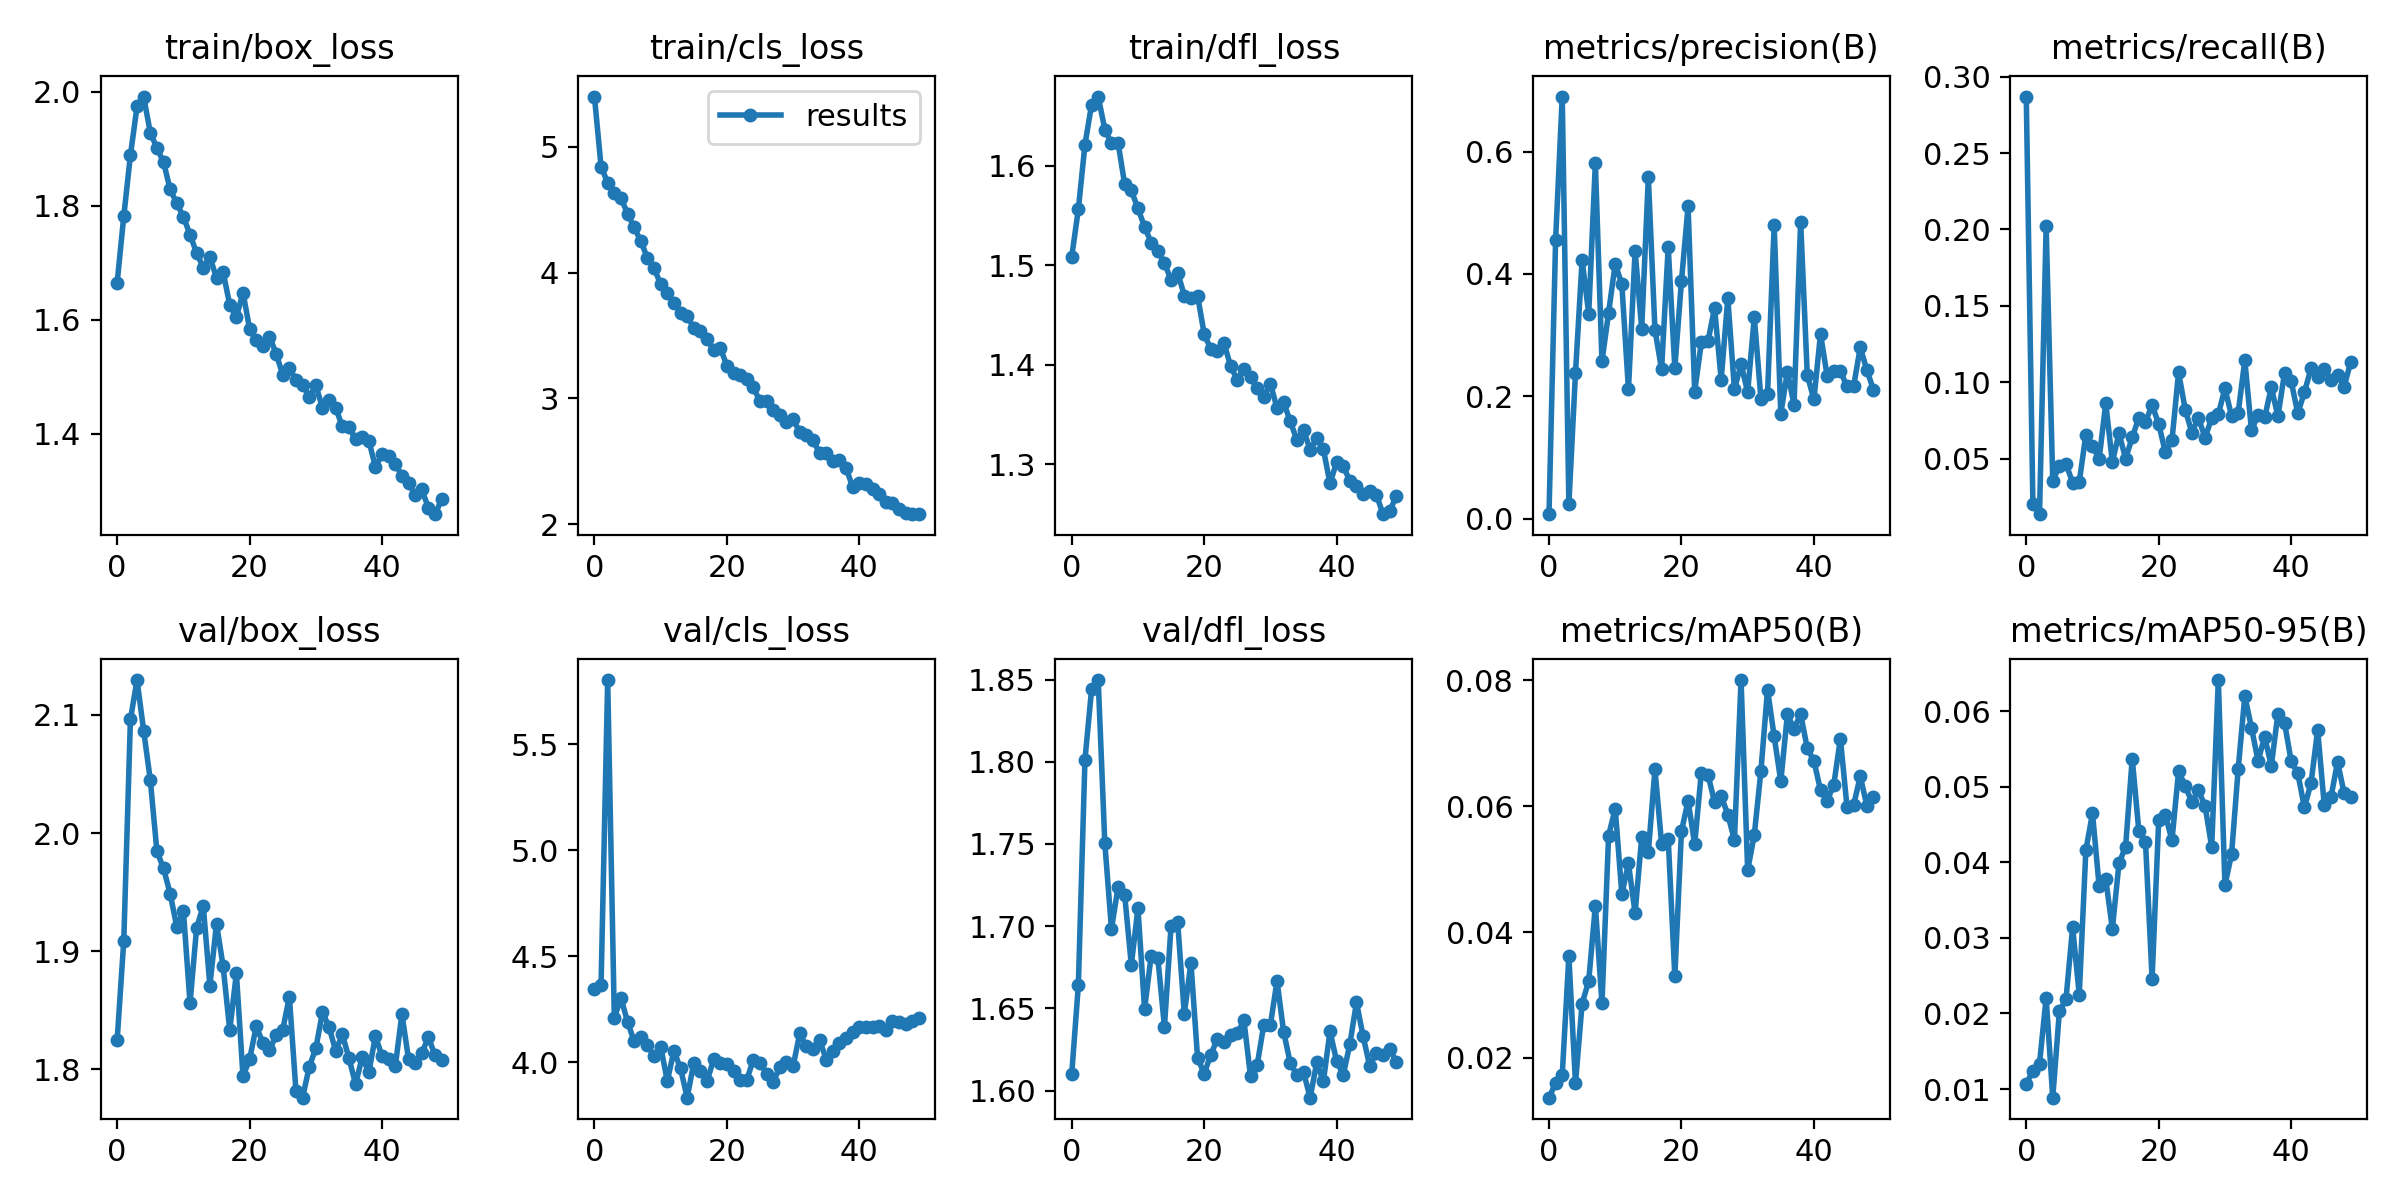

In [6]:
Image("/home/hpate061/CitrusHack/runs/detect/train/results.png")

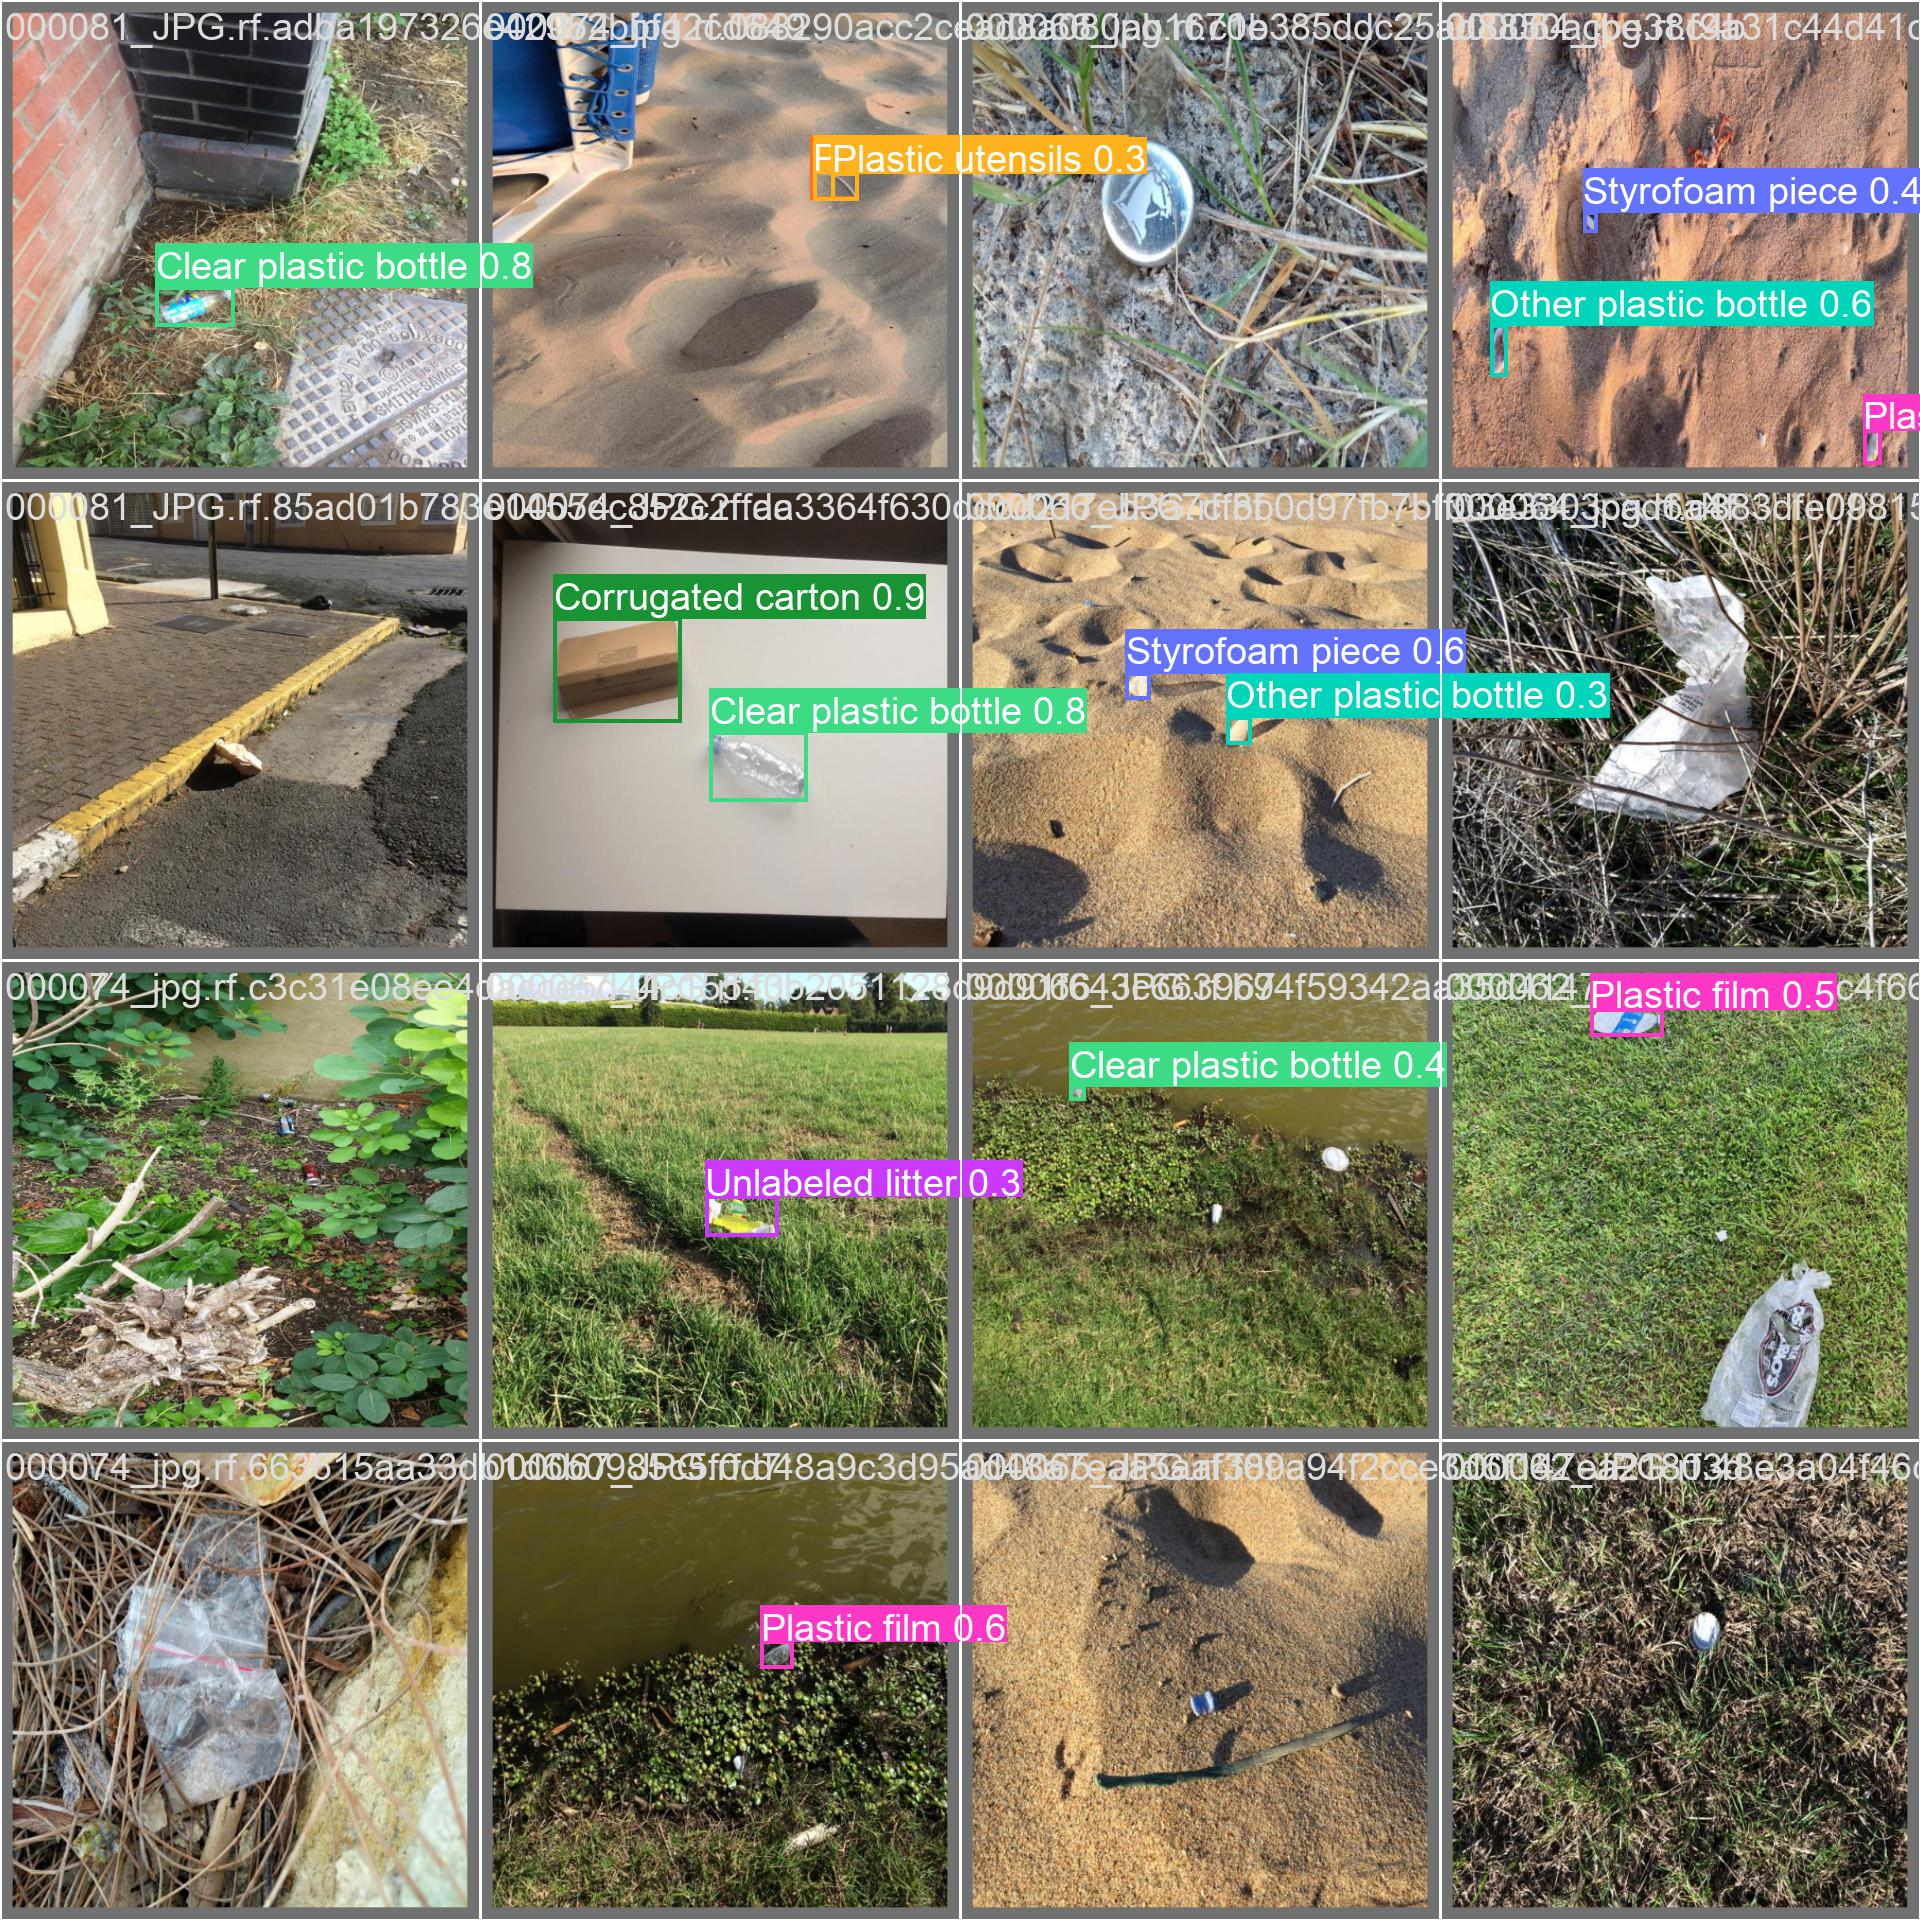

In [7]:
Image("/home/hpate061/CitrusHack/runs/detect/train/val_batch1_pred.jpg")

In [8]:
!yolo task=detect mode=val model=/home/hpate061/CitrusHack/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.90 🚀 Python-3.9.16 torch-2.0.0 CUDA:0 (NVIDIA RTX A4000, 16109MiB)
Model summary (fused): 168 layers, 3017153 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /home/hpate061/CitrusHack/TACO:-Trash-Annotations-in-Context-Datas
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        299        891      0.252     0.0791       0.08     0.0644
               Aerosol        299          2          0          0      0.064      0.064
Aluminium blister pack        299          1          1          0          0          0
        Aluminium foil        299         12       0.46      0.417       0.43      0.378
             Cigarette        299        187      0.232    0.00535     0.0124    0.00463
  Clear plastic bottle        299         61      0.266      0.344      0.231      0.171
     Corrugated carton        299          8     0.0419      0.125      0.129      0.115
          Crisp packet        299          6    

In [10]:
!yolo task=detect mode=predict model=/home/hpate061/CitrusHack/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images

Ultralytics YOLOv8.0.90 🚀 Python-3.9.16 torch-2.0.0 CUDA:0 (NVIDIA RTX A4000, 16109MiB)
Model summary (fused): 168 layers, 3017153 parameters, 0 gradients, 8.1 GFLOPs

image 1/150 /home/hpate061/CitrusHack/TACO:-Trash-Annotations-in-Context-Dataset-2/test/images/000000_JPG.rf.3144ee029a987258a2aaaf0ebf2b01c8.jpg: 576x576 (no detections), 4.5ms
image 2/150 /home/hpate061/CitrusHack/TACO:-Trash-Annotations-in-Context-Dataset-2/test/images/000000_JPG.rf.fadf92df9bf682513fc56e64a10ff814.jpg: 576x576 1 Plastic straw, 4.7ms
image 3/150 /home/hpate061/CitrusHack/TACO:-Trash-Annotations-in-Context-Dataset-2/test/images/000000_jpg.rf.c8c5a84c1024029e4083398c3475b279.jpg: 576x576 1 Plastic film, 1 Plastic straw, 4.6ms
image 4/150 /home/hpate061/CitrusHack/TACO:-Trash-Annotations-in-Context-Dataset-2/test/images/000000_jpg.rf.f0e012c4e9f4754a86672f67d42bbc6f.jpg: 576x576 1 Disposable plastic cup, 1 Paper cup, 4.4ms
image 5/150 /home/hpate061/CitrusHack/TACO:-Trash-Annotations-in-Context-Dataset-2

In [13]:
project.version(dataset.version).deploy(model_type='yolov8', model_path="/home/hpate061/CitrusHack/runs/detect/train")

Dependency ultralytics<=8.0.20 is required but found version=8.0.90, to fix: `pip install ultralytics<=8.0.20`
An error occured when getting the model upload URL: 404 Client Error: Not Found for url: https://api.roboflow.com/mohamed-traore-2ekkp/taco-trash-annotations-in-context/2/uploadModel?api_key=McoQ2UFDxFzalwE5z5dN&modelType=yolov8&nocache=true
